# Лабораторная работа №2
## Информированный и неинформированный поиск
#### _Выполнил: Сарнацкий Владислав_
#### _Группа: ІП-71мн_

<hr />

*Цель работы:* Рассмотреть и исследовать разные алгоритмы информированного и неинформированного поиска. Сравнить эффективность их работы.

<hr />

Всякие нужные импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Импортируем состояния **EightPuzzleState** и алгоритмы **BFS, LDFS, IDS, RBFS, A_star**

In [2]:
from lab2_problems import EightPuzzleState
from lab2_algs import BFS, LDFS, IDS, RBFS, A_star

Пример начального состояния "игры в 8":

In [3]:
EightPuzzleState().random_state(30).show()

-------------
| 2 | 5 | 8 |
-------------
| 3 | 0 | 6 |
-------------
| 4 | 7 | 1 |
-------------


Целевое состояние "игры в 8":

In [4]:
EightPuzzleState().random_state(0).show()

-------------
| 8 | 7 | 6 |
-------------
| 5 | 4 | 3 |
-------------
| 2 | 1 | 0 |
-------------


Протестируем алгоритмы алгоритмы на задаче "игры в 8". За начальное состояние доски возьмем целевое состояние и сделаем несколько "худших" согласно метрике "h1" ходов. Количество ходов возьмем из списка {1, 3, 5, 7}.

In [5]:
res = []
for swaps in [1, 3, 5, 7]:
    for test in range(50):
        s = EightPuzzleState().random_state(swaps)
        _, iters, time = RBFS(s, 'h1')
        res.append(['RBFS', 'INF', 'H1', swaps, iters, time])
        
        _, iters, time = RBFS(s, 'h2')
        res.append(['RBFS', 'INF', 'H2', swaps, iters, time])
        
        _, iters, time = A_star(s, 'h1')
        res.append(['A*', 'INF', 'H1', swaps, iters, time])
        
        _, iters, time = A_star(s, 'h2')
        res.append(['A*', 'INF', 'H2', swaps, iters, time])
        
        _, iters, time = BFS(s)
        res.append(['BFS', 'NOINF', None, swaps, iters, time])
        
        _, iters, time = IDS(s)
        res.append(['IDS', 'NOINF', None, swaps, iters, time])
        
df = pd.DataFrame(res, columns=['Algorithm', 'Alg type', 'Heuristic', 'Swaps', 'Iterations', 'Execution time'])

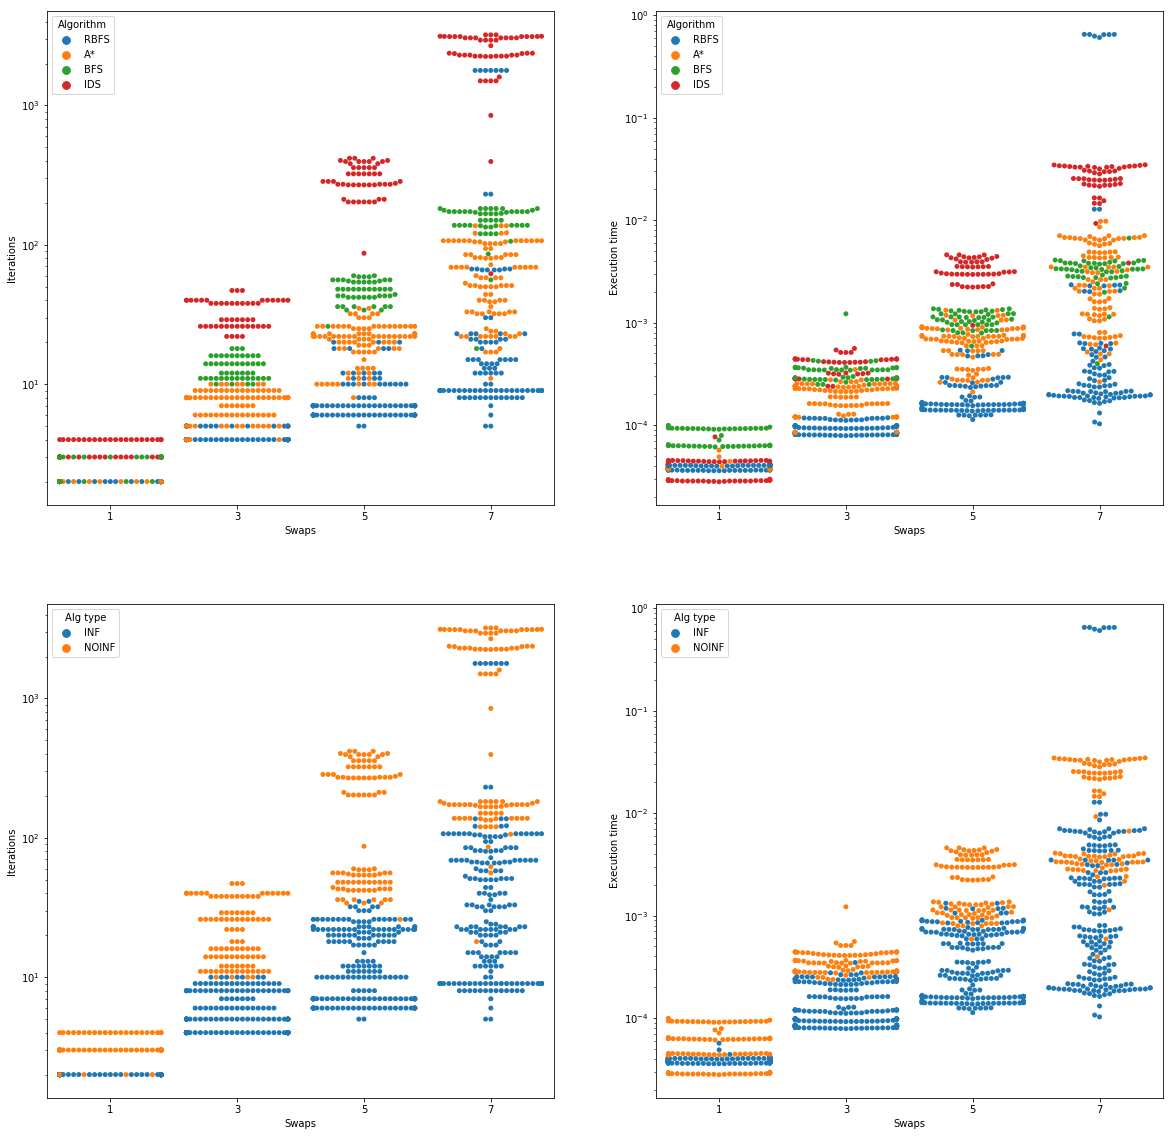

In [6]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax[0, 0].set(yscale='log')
ax[0, 1].set(yscale='log')
ax[1, 0].set(yscale='log')
ax[1, 1].set(yscale='log')
#sns.swarmplot(y="Iterations", x="Algorithm", hue="Swaps",
#              data=df.where(df['Swaps'] == 1),
#              zorder=1, ax=ax)
sns.swarmplot(y="Iterations", x="Swaps", hue="Algorithm",
              data=df,
              zorder=1, ax=ax[0, 0])
sns.swarmplot(y="Execution time", x="Swaps", hue="Algorithm",
              data=df,
              zorder=1, ax=ax[0, 1])
sns.swarmplot(y="Iterations", x="Swaps", hue="Alg type",
              data=df,
              zorder=1, ax=ax[1, 0])
sns.swarmplot(y="Execution time", x="Swaps", hue="Alg type",
              data=df,
              zorder=1, ax=ax[1, 1])
plt.show()

- Левый верхний график отображает зависимость количества операций "развернуть текущее состояние" от названия алгоритма и количества ходов при генерации начального состояния.
- Правый верхний график отображает зависимость времени выполнения от названия алгоритма и количества ходов при генерации начального состояния.
- Левый нижний график отображает зависимость количества операций "развернуть текущее состояние" от типа алгоритма и количества ходов при генерации начального состояния.
- Правый нижний график отображает зависимость времени выполнения от типа алгоритма и количества ходов при генерации начального состояния.

_Можно заметить интеерсную аномалию: аллгоритм RBFS, который показывает найлучшую производительность, при некоторых комбинациях входных данных работает медленно. Попробуем выяснить почему._

Отобразим зависимость времени выполнения эвристических алгоритмов в зависимости от выбранной эвристики (RBFS справа).

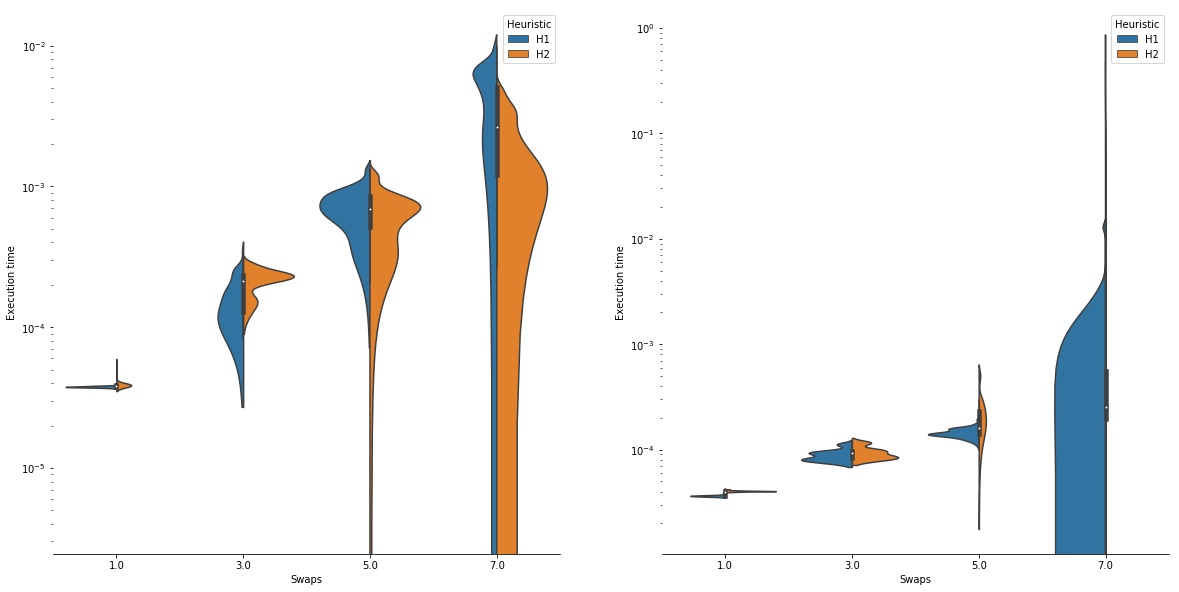

In [7]:
f, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set(yscale='log')
ax[1].set(yscale='log')

sns.violinplot(x="Swaps", y="Execution time", hue="Heuristic", data=df.where(df['Algorithm'] == 'A*'), split=True, ax=ax[0])
sns.violinplot(x="Swaps", y="Execution time", hue="Heuristic", data=df.where(df['Algorithm'] == 'RBFS'), split=True, ax=ax[1])
sns.despine(left=True)
plt.show()

Можно заметить, что аномалия возникает если эвристика H2.
Проведем тот же самый эксперимент исключив комбинацию RBFS, H2. (И заодно увеличим поличество начальных перестановок до 9).

In [8]:
res = []
for swaps in [1, 3, 5, 7, 9]:
    for test in range(50):
        s = EightPuzzleState().random_state(swaps)
        _, iters, time = RBFS(s, 'h1')
        res.append(['RBFS', 'INF', 'H1', swaps, iters, time])
        
        _, iters, time = A_star(s, 'h1')
        res.append(['A*', 'INF', 'H1', swaps, iters, time])
        
        _, iters, time = A_star(s, 'h2')
        res.append(['A*', 'INF', 'H2', swaps, iters, time])
        
        _, iters, time = BFS(s)
        res.append(['BFS', 'NOINF', None, swaps, iters, time])
        
        _, iters, time = IDS(s)
        res.append(['IDS', 'NOINF', None, swaps, iters, time])
        
df = pd.DataFrame(res, columns=['Algorithm', 'Alg type', 'Heuristic', 'Swaps', 'Iterations', 'Execution time'])

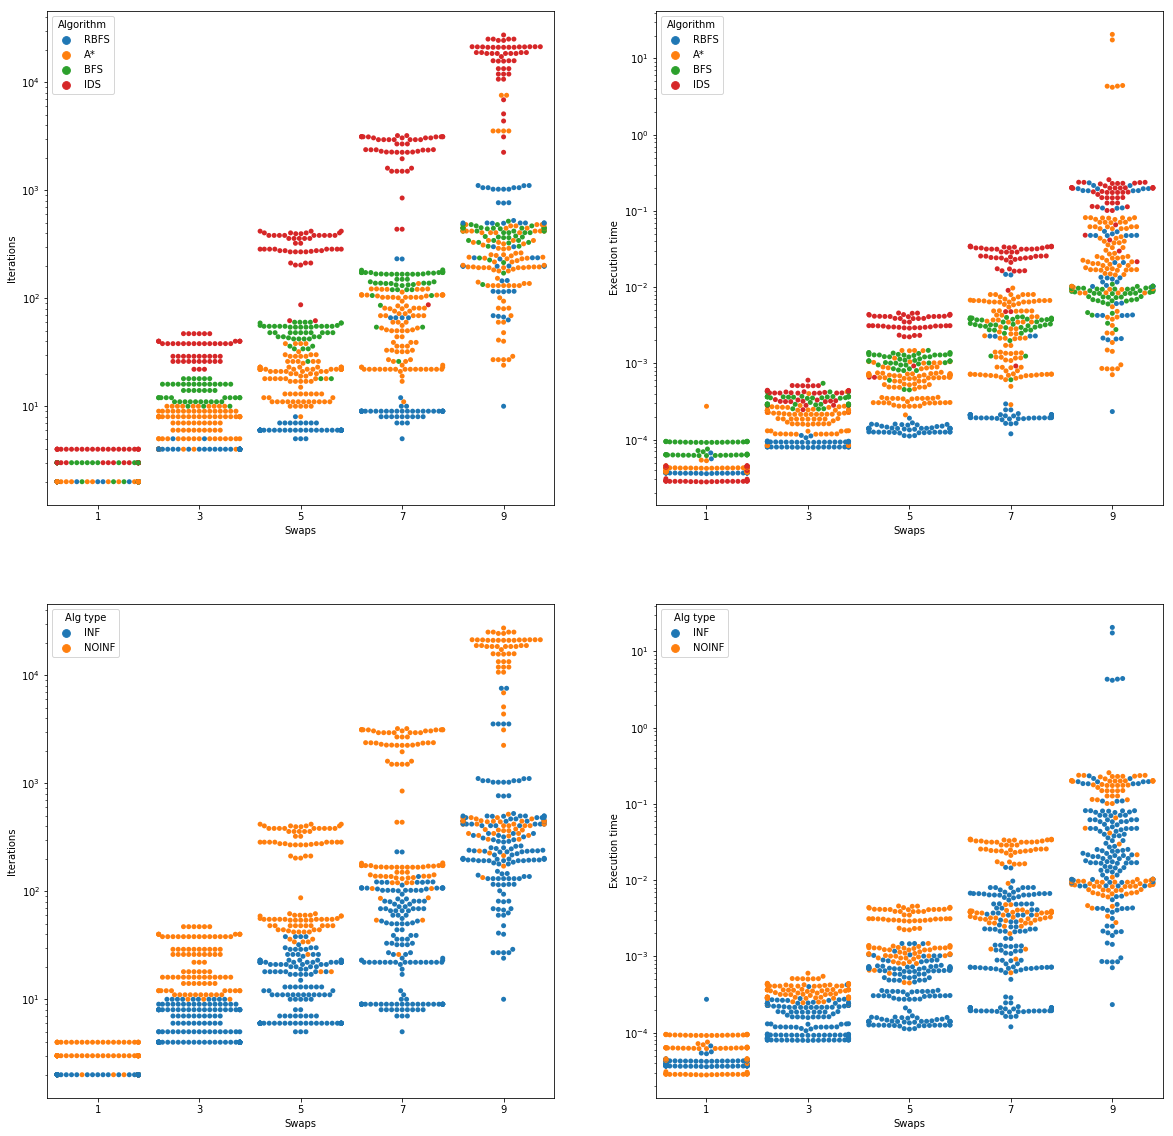

In [9]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax[0, 0].set(yscale='log')
ax[0, 1].set(yscale='log')
ax[1, 0].set(yscale='log')
ax[1, 1].set(yscale='log')
#sns.swarmplot(y="Iterations", x="Algorithm", hue="Swaps",
#              data=df.where(df['Swaps'] == 1),
#              zorder=1, ax=ax)
sns.swarmplot(y="Iterations", x="Swaps", hue="Algorithm",
              data=df,
              zorder=1, ax=ax[0, 0])
sns.swarmplot(y="Execution time", x="Swaps", hue="Algorithm",
              data=df,
              zorder=1, ax=ax[0, 1])
sns.swarmplot(y="Iterations", x="Swaps", hue="Alg type",
              data=df,
              zorder=1, ax=ax[1, 0])
sns.swarmplot(y="Execution time", x="Swaps", hue="Alg type",
              data=df,
              zorder=1, ax=ax[1, 1])
plt.show()

Можно заметить, что теперь возникшая аномалия относится к алгоритму A\*.
Выясним причину этого. Построим график зависимости скорости работы A\* отдельно для каждой эвристики.

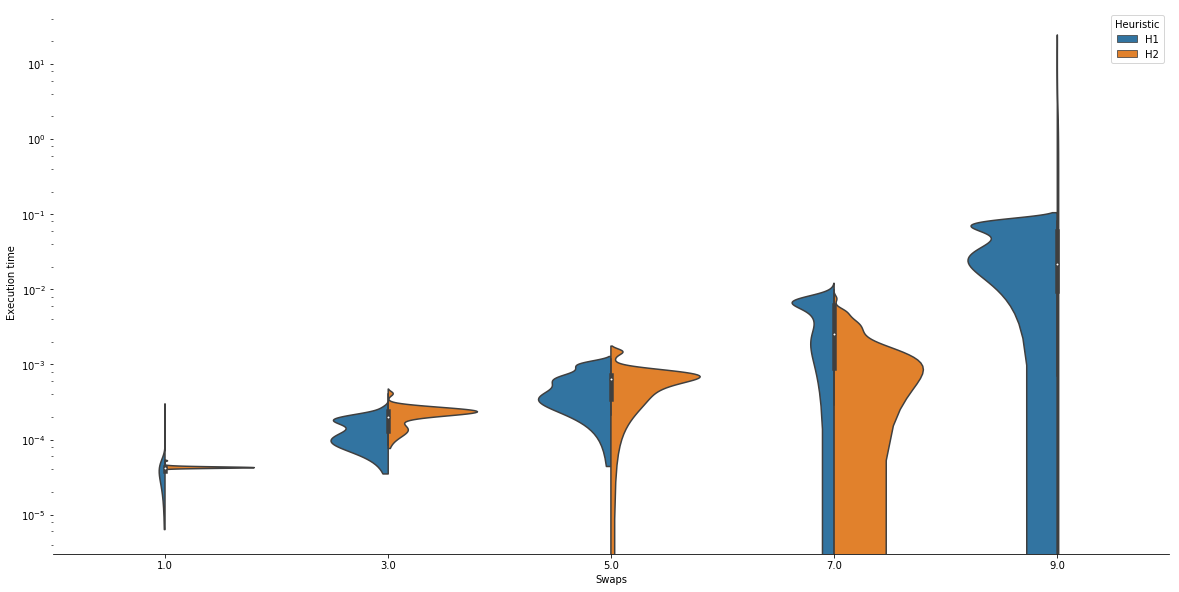

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
ax.set(yscale='log')

sns.violinplot(x="Swaps", y="Execution time", hue="Heuristic", data=df.where(df['Algorithm'] == 'A*'), split=True, ax=ax)
sns.despine(left=True)
plt.show()

Можно заметить, что эвристика H2 опять во всем виновата. Исключим ее.

In [11]:
res = []
for swaps in [1, 3, 5, 7, 9]:
    for test in range(50):
        s = EightPuzzleState().random_state(swaps)
        _, iters, time = RBFS(s, 'h1')
        res.append(['RBFS', 'INF', 'H1', swaps, iters, time])
        
        _, iters, time = A_star(s, 'h1')
        res.append(['A*', 'INF', 'H1', swaps, iters, time])
        
        _, iters, time = BFS(s)
        res.append(['BFS', 'NOINF', None, swaps, iters, time])
        
        _, iters, time = IDS(s)
        res.append(['IDS', 'NOINF', None, swaps, iters, time])
        
df = pd.DataFrame(res, columns=['Algorithm', 'Alg type', 'Heuristic', 'Swaps', 'Iterations', 'Execution time'])

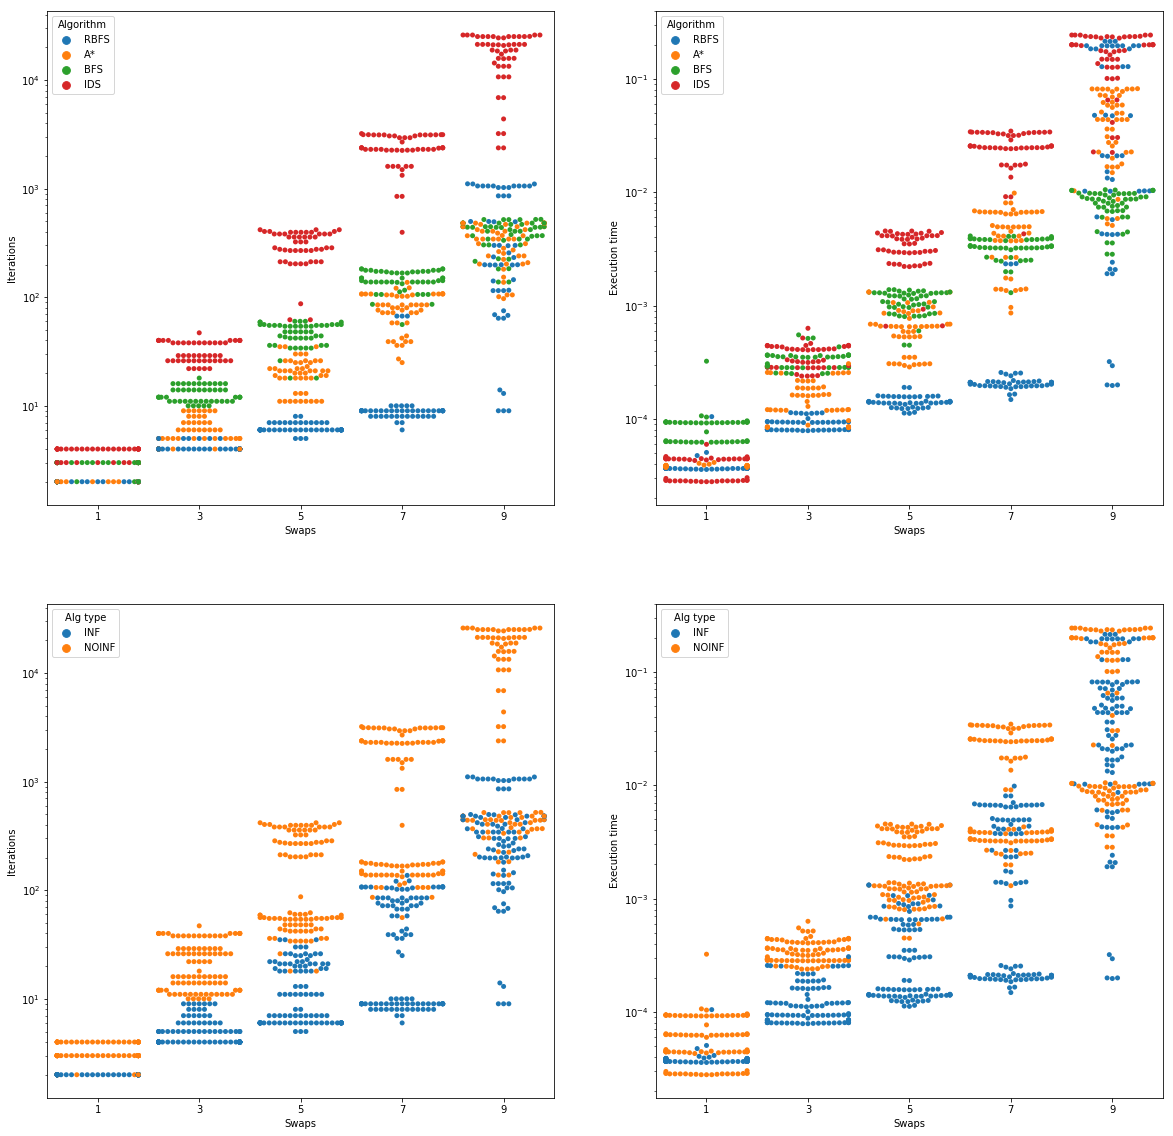

In [12]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax[0, 0].set(yscale='log')
ax[0, 1].set(yscale='log')
ax[1, 0].set(yscale='log')
ax[1, 1].set(yscale='log')
#sns.swarmplot(y="Iterations", x="Algorithm", hue="Swaps",
#              data=df.where(df['Swaps'] == 1),
#              zorder=1, ax=ax)
sns.swarmplot(y="Iterations", x="Swaps", hue="Algorithm",
              data=df,
              zorder=1, ax=ax[0, 0])
sns.swarmplot(y="Execution time", x="Swaps", hue="Algorithm",
              data=df,
              zorder=1, ax=ax[0, 1])
sns.swarmplot(y="Iterations", x="Swaps", hue="Alg type",
              data=df,
              zorder=1, ax=ax[1, 0])
sns.swarmplot(y="Execution time", x="Swaps", hue="Alg type",
              data=df,
              zorder=1, ax=ax[1, 1])
plt.show()

### Выводы
- Рассмотрел и исследовал разные алгоритмы информированного и неинформированного поиска. Сравнил эффективность их работы;
- Полученные результаты показывают, что:
 - Эвристика H2 в некоторых случаях намного менее эффективна чем H1;
 - Самым эффективным алгоритмом неинформированного поиска при глубоком залегании конечного состояния является BFS;
 - Самым эффективным алгоритмом неинформированного поиска при неглубоком залегании конечного состояния является IDS;
 - Самым эффективным алгоритмом информированного поиска является RBFS;
 - Алгоритмы информированного поиска в целом более эффективны чем алгоритмы неинформированного поиска. Однако, при глубоком залегании решения разница между ними по времени не существена. Это может быть вызвано необходимостью высчитывать эвристику каждого состояния.